# Final project plots #


In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns

In [105]:
# Loading the data
beers_data = pd.read_csv('beers.csv')
breweries_data = pd.read_csv('breweries.csv')
users_data = pd.read_csv('users.csv')

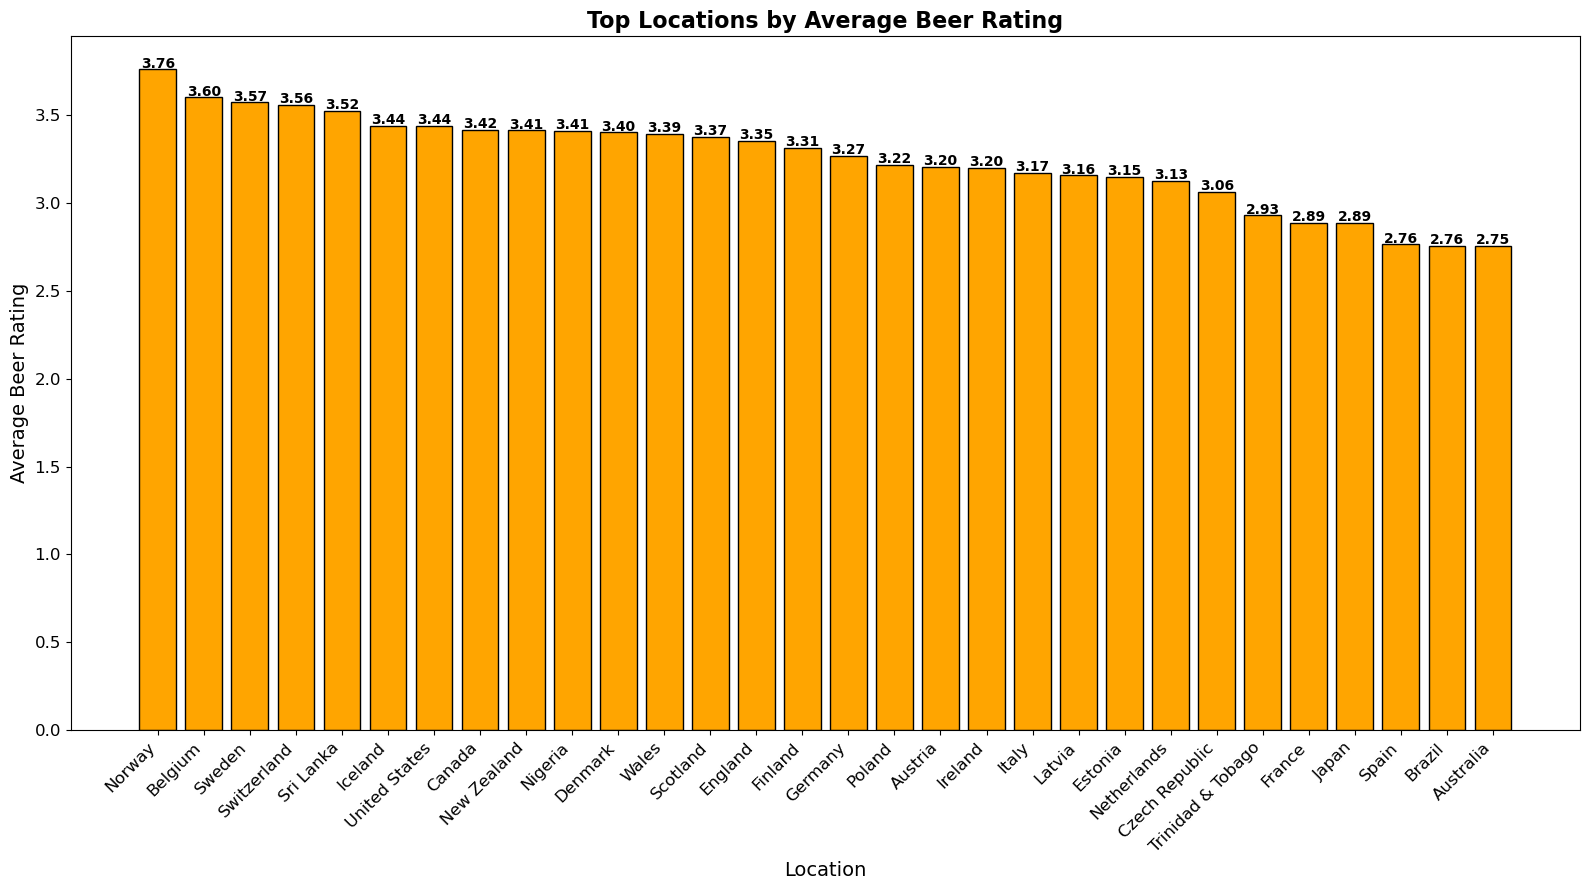

In [106]:
# List of US state names
us_states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", 
             "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", 
             "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", 
             "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", 
             "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", 
             "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", 
             "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
             "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", 
             "Washington", "West Virginia", "Wisconsin", "Wyoming"]

# Normalizing location names for US states to "United States"
merged_data['location'] = merged_data['location'].apply(lambda x: 'United States' if any(state in x for state in us_states) else x)

# Filterering out beers with less than 200 reviews to ensure popularity
merged_data = merged_data[merged_data['nbr_ratings'] >= 200]

# Calculating weighted averages for each beer
merged_data['weighted_avg'] = merged_data['avg'] * merged_data['nbr_ratings']

# Grouping by location, then aggregate the necessary metrics
location_avg_ratings = merged_data.groupby('location').agg({
    'weighted_avg': 'sum',
    'nbr_ratings': 'sum'
})

# Calculating the average rating for each location
location_avg_ratings['average_rating'] = location_avg_ratings['weighted_avg'] / location_avg_ratings['nbr_ratings']

# Filtering locations with a significant number of reviews (at least 200)
location_avg_ratings = location_avg_ratings[location_avg_ratings['nbr_ratings'] >= 200]

# Getting the top locations based on average rating
top_locations = location_avg_ratings.nlargest(30, 'average_rating')

# Plotting the top locations
plt.figure(figsize=(16, 9))
plt.bar(top_locations.index, top_locations['average_rating'], color='orange', edgecolor='black')
plt.title('Top Locations by Average Beer Rating', fontsize=16, fontweight='bold')
plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Beer Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(top_locations['average_rating']):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', color='black', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()

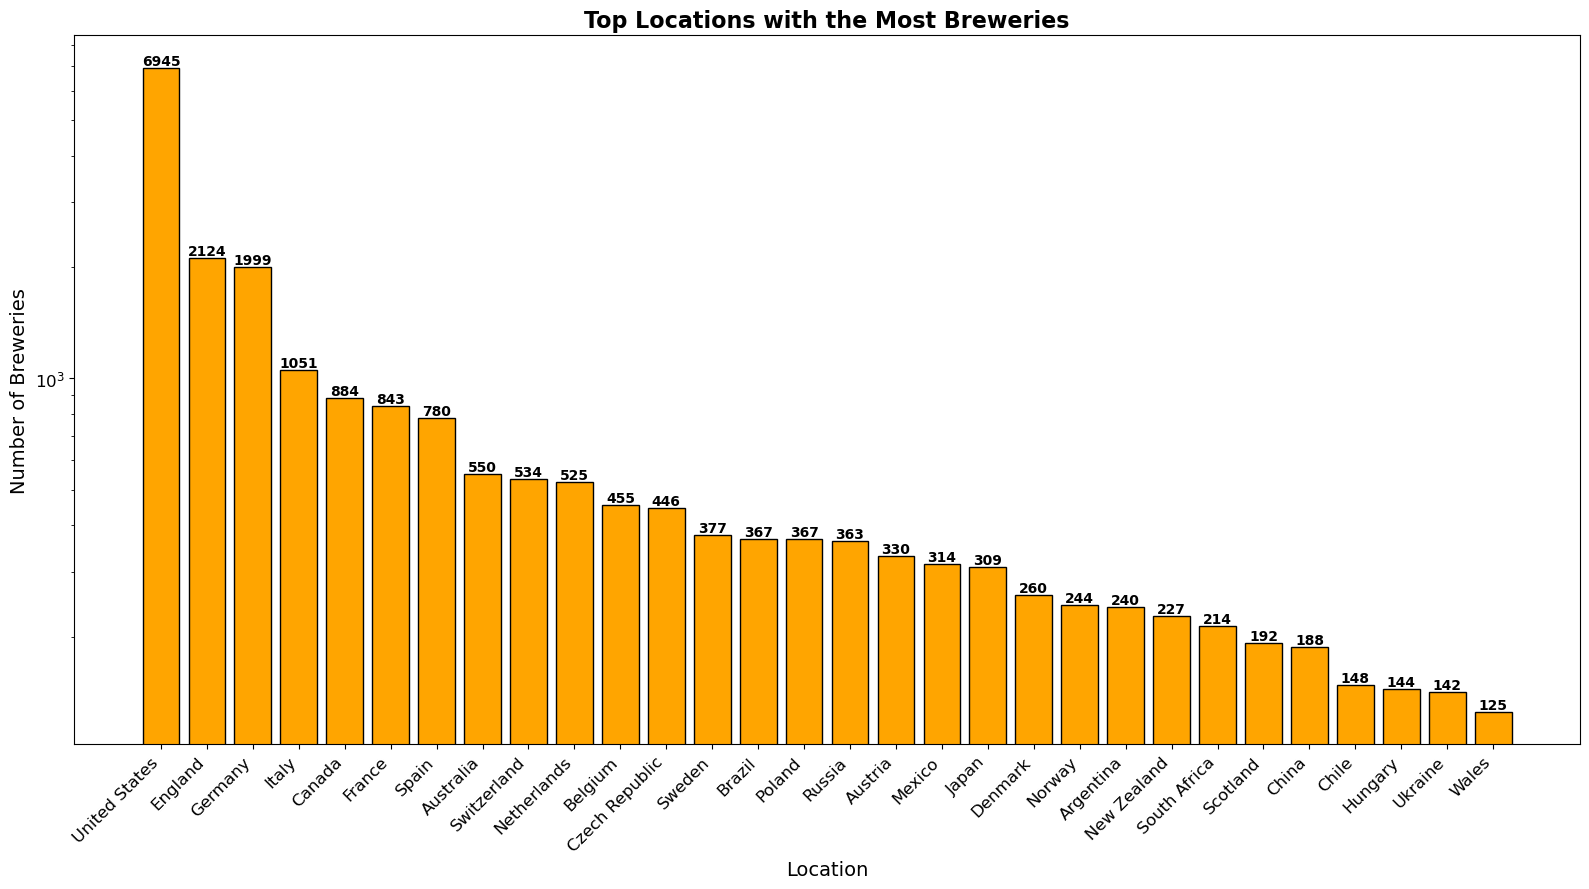

In [107]:
breweries_data['location'] = breweries_data['location'].apply(lambda x: 'United States' if any(state in x for state in us_states) else x)

# Grouping the data by 'location' and count the number of unique breweries in each location
brewery_counts = breweries_data.groupby('location')['id'].nunique().reset_index()
brewery_counts.columns = ['location', 'count']

# Selecting the top locations with the most breweries
top_locations = brewery_counts.nlargest(30, 'count')

# Plotting the top locations
plt.figure(figsize=(16, 9))
bars = plt.bar(top_locations['location'], top_locations['count'], color='orange', edgecolor='black')
plt.title('Top Locations with the Most Breweries', fontsize=16, fontweight='bold')
plt.xlabel('Location', fontsize=14)
plt.ylabel('Number of Breweries', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Setting the y-axis to a logarithmic scale
plt.yscale('log')

# Adding annotations on each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{int(yval)}", va='bottom', ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

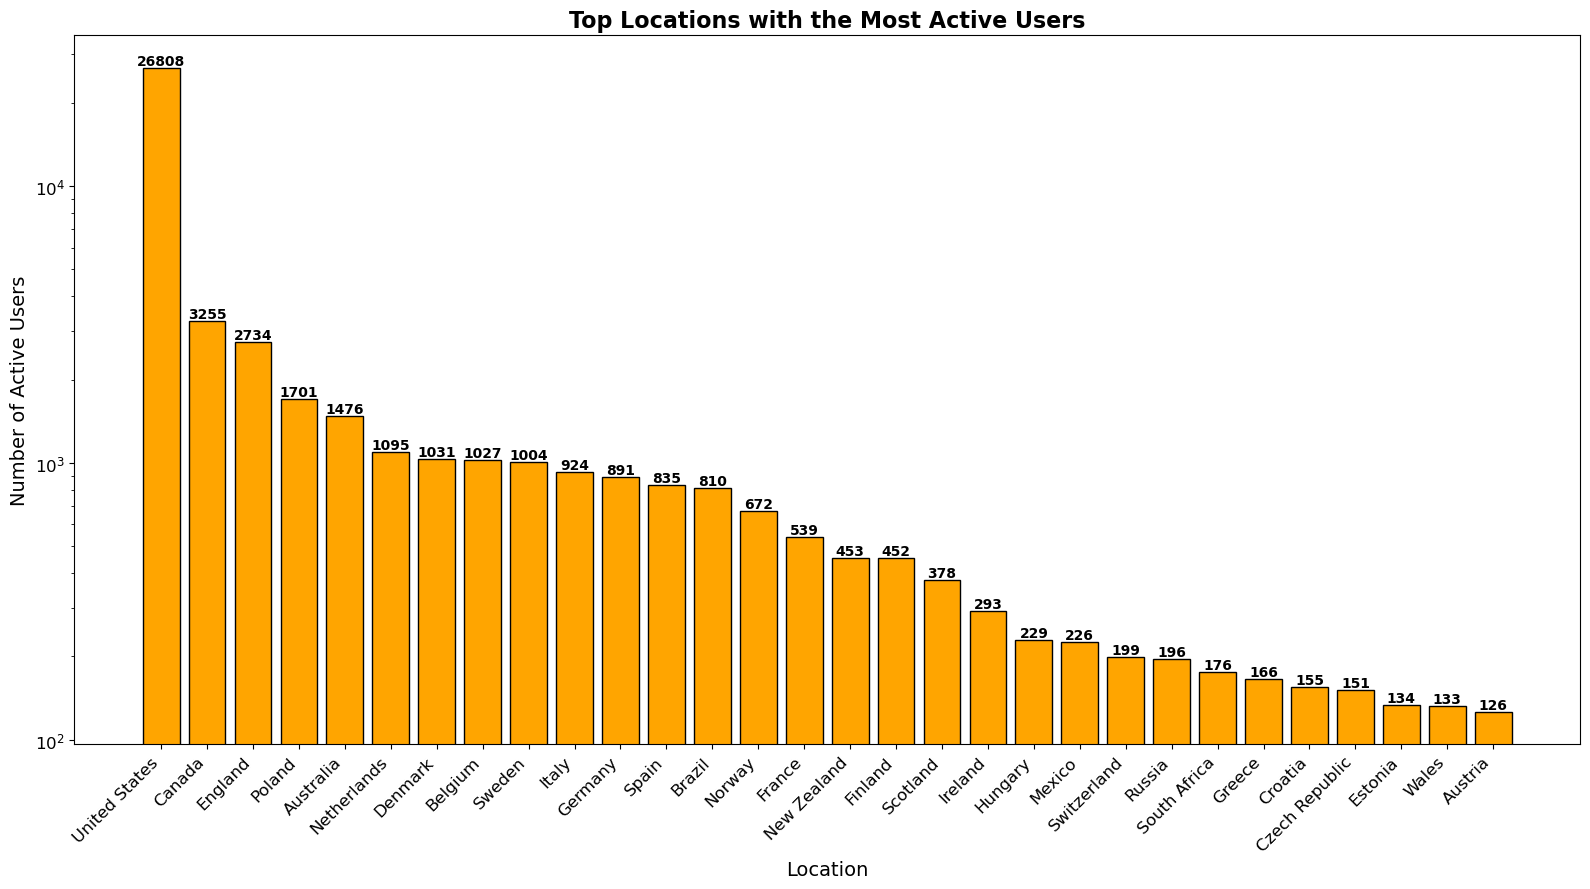

In [102]:
# Filtering out rows with NaN values in the 'location' column
users_data = users_data[~users_data['location'].str.contains('nan', case=False, na=False)]

users_data['location'] = users_data['location'].astype(str)
users_data['location'] = users_data['location'].apply(
    lambda x: 'United States' if any(state in x for state in us_states) else x)

# Grouping the data by 'location' and count the number of user in each location
location_activity = users_data.groupby('location')['user_id'].nunique().reset_index(name='active_users')

# Selecting the top locations with the most active users
top_locations = location_activity.sort_values(by='active_users', ascending=False).head(30)

# Plotting the top locations
plt.figure(figsize=(16, 9))
bars = plt.bar(top_locations['location'], top_locations['active_users'], color='orange', edgecolor='black')
plt.title('Top Locations with the Most Active Users', fontsize=16, fontweight='bold')
plt.xlabel('Location', fontsize=14)
plt.ylabel('Number of Active Users', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Seting the y-axis to a logarithmic scale
plt.yscale('log')

# Adding annotations on each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{int(yval)}", va='bottom', ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()


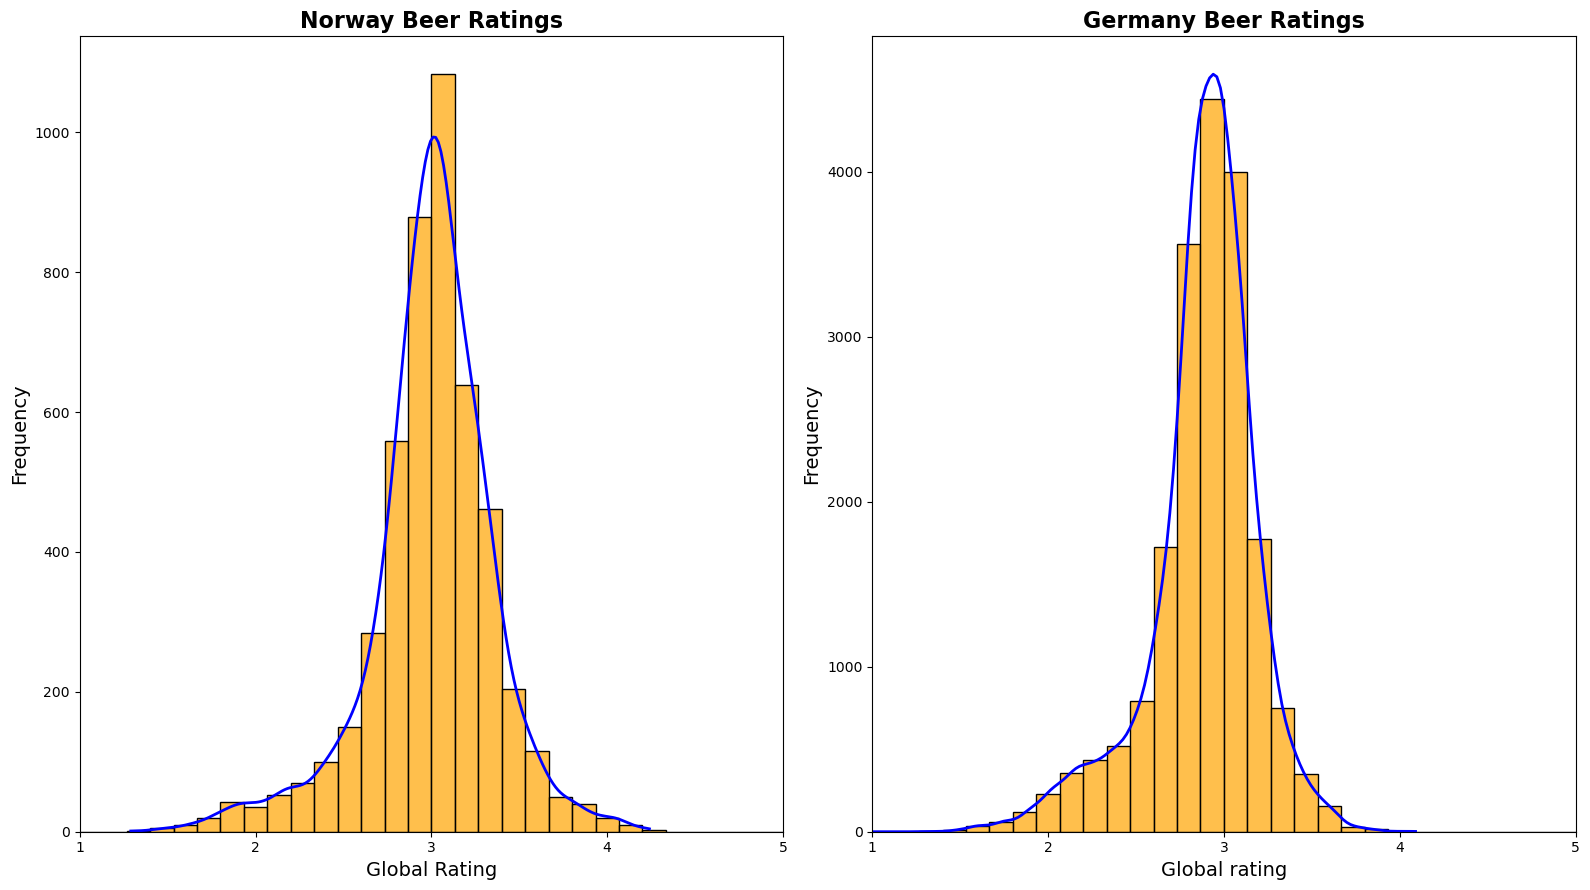

In [108]:
# Ignoring warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
np.seterr(divide='ignore', invalid='ignore')

# Filtering Norway breweries
norway_breweries = breweries_data[breweries_data['location'] == 'Norway']
norway_beers = pd.merge(beers_data, norway_breweries, left_on='brewery_id', right_on='id', how='inner')

# Filtering Germany breweries
germany_breweries = breweries_data[breweries_data['location'] == 'Germany']
germany_beers = pd.merge(beers_data, germany_breweries, left_on='brewery_id', right_on='id', how='inner')

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

# Plotting histogram for Norway beer ratings
sns.histplot(data=norway_beers, x='avg', bins=30, color='orange', kde=True, edgecolor='black', alpha=0.7, binrange=(1, 5), ax=axes[0])
axes[0].lines[0].set_color('blue')
axes[0].lines[0].set_linewidth(2)
axes[0].set_title('Norway Beer Ratings', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Global Rating', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].set_xlim(1, 5)
axes[0].set_xticks(range(1, 6))
axes[0].grid(False)

# Plotting histogram for Germany beer ratings
sns.histplot(data=germany_beers, x='avg', bins=30, color='orange', kde=True, edgecolor='black', alpha=0.7, binrange=(1, 5), ax=axes[1])
axes[1].lines[0].set_color('blue')
axes[1].lines[0].set_linewidth(2)
axes[1].set_title('Germany Beer Ratings', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Global rating', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].set_xlim(1, 5)
axes[1].set_xticks(range(1, 6))
axes[1].grid(False)

plt.tight_layout()
plt.show()